In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.listdir("../"))

# 此处会列出当前文件下面所有的文件和文件夹的名字

['.ipynb_checkpoints', 'apple.csv', 'bingganhe.png', 'course1_arithmetic-and-variables.ipynb', 'course2_data-types.ipynb', 'course3_conditions-and-conditional-statements.ipynb', 'course4_functions.ipynb', 'course5_intro-to-lists.ipynb', 'course7_working-with-external-libraries.ipynb', 'course8_pandas-numpy.ipynb', 'dataexplorate', 'intro_to_food.py', 'learntools', 'learntools-master.zip', 'my_array.npy', 'numpy-pandas125.ipynb', 'output.csv', 'practice1_arithmetic_and_variables.ipynb', 'practice2_data-types.ipynb', 'practice3_conditions-and-conditional-statements.ipynb', 'practice4_functions.ipynb', 'practice5_intro-to-lists.ipynb', 'practice6_strings-and-dictionaries.ipynb', 'practise7_assignment.ipynb', 'practise8_numpy-pandas.ipynb', 'train.csv', 'yuanboyuan.png', '__pycache__']


In [25]:
#importing the dataset
data = pd.read_csv('BlackFriday.csv')

In [26]:
#打印datafame的前5行数据
------------------------

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# **数据清洗DATA CLEANING **

In [27]:
#查看数据中每个列为空值的个数,并从大到小排序
missing_values = ---------------------------
missing_values

Product_Category_3            373299
Product_Category_2            166986
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Purchase                           0
dtype: int64

In [4]:
#计算该列空值出现的比例。
missing_values = ---------------------------
print(f'{missing_values *100} %')

Product_Category_3    69.441029
Product_Category_2    31.062713
dtype: float64 %


#### 从数据上我们可以看出这两个列空值比例非常高，说明人们普遍觉得这两个列 的选择并不在给定的选择中，因此都选择了Nan，因此，可以把这两个列的值全部用0代替。

In [28]:
# 我们可以把数据中nan换成0.
data = ---------------------------

In [31]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [32]:
missing_values = ---------------------------
print(f'{missing_values *100} %')

Series([], dtype: float64) %


#### 上面是对于丢失值的处理方法。接下来我们看一下每个列的类型

In [7]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

上面的object数据类型，是没办法直接用于机器学习的类型，我们应该对其进行处理。首先处理Gender列

In [33]:
#查看一下该列的取值情况，就是有多少个取值类型
gender = ---------------------------
gender

array(['F', 'M'], dtype=object)

考虑到性别只有2类，我们可以设置一个函数如下，使得  映射 M=1 和 F=0. 

In [34]:
def map_gender(gender):
   ---------------------------
data['Gender'] = data['Gender'].apply(map_gender)

接下来我们看一下Age列

In [35]:
#首先看一下age列的取值种类
age = ---------------------------
age

array(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
      dtype=object)

我们按着上面的种类，分别映射为0，1，2，3，4，5，6几个数字类型种类

In [36]:
def map_age(age):
    ---------------------------
data['Age'] = data['Age'].apply(map_age)

接下来考虑City_Category列

In [37]:
# 查看累的取值情况
city_category = ---------------------------
city_category

array(['A', 'B', 'C'], dtype=object)

把A--2，B--1，C---0如此映射

In [38]:
def map_city_categories(city_category):
    ---------------------------
data['City_Category'] = data['City_Category'].apply(map_city_categories)

处理这个列: **Stay_In_Current_City_Years**

In [14]:
#查看取值情况
city_stay = ---------------------------
city_stay

array(['0', '1', '2', '3', '4+'], dtype=object)

#### 进行映射4+映射为4，其他转换为int类型即可。

In [39]:
def map_stay(stay):
        ---------------------------
#             current_years = stay
#             current_years = current_years.astype(int)
#             return current_years
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].apply(map_stay)    

删掉对于预测结果（预测一个人的黑五当天的购买力）不相关的用户id和商品id列  **User_ID** and **Product_ID** 

In [40]:
cols = ['User_ID','Product_ID']
---------------------------

重新查看一下data的前5行数据，观察与之前的不同

In [41]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,2,2,0,3,0.0,0.0,8370
1,0,0,10,2,2,0,1,6.0,14.0,15200
2,0,0,10,2,2,0,12,0.0,0.0,1422
3,0,0,10,2,2,0,12,14.0,0.0,1057
4,1,6,16,0,4,0,8,0.0,0.0,7969


**做的不错!**
这只是很小一部分的数据清洗知识的应用。它还可以更复杂

# **数据挖掘-EDA(ExploratoryDataAnalysis)**
### 展示非作业，可以学习观察对于一份数据，通常别人是如何作图处理的

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


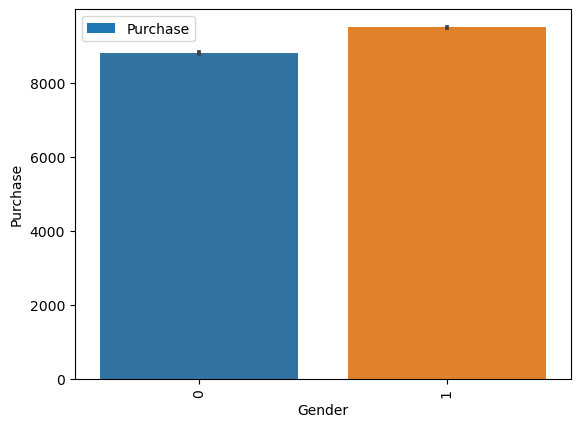

In [18]:
data[['Gender','Purchase']].groupby('Gender').mean().plot.bar()
sns.barplot('Gender', 'Purchase', data = data)
plt.show()

在黑五这一天，虽然女性花了不少的钱，但是男性却是比女性还高

我们看一下年龄于购买了的关系通常情况下，当你年纪增大，工资加张的时候，你的购买了会更强。我们来看看数据把

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


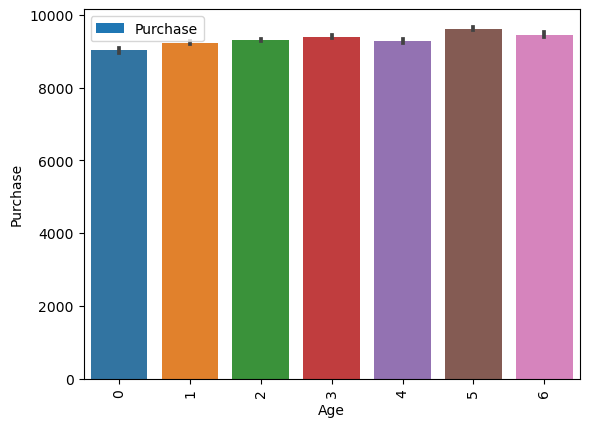

In [42]:
data[['Age','Purchase']].groupby('Age').mean().plot.bar()
sns.barplot('Age', 'Purchase', data = data)
plt.show()

我们可以绘制一下箱图来分析下年龄和购买力的关系，可以检索这种绘图方式所传递出来的信息

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


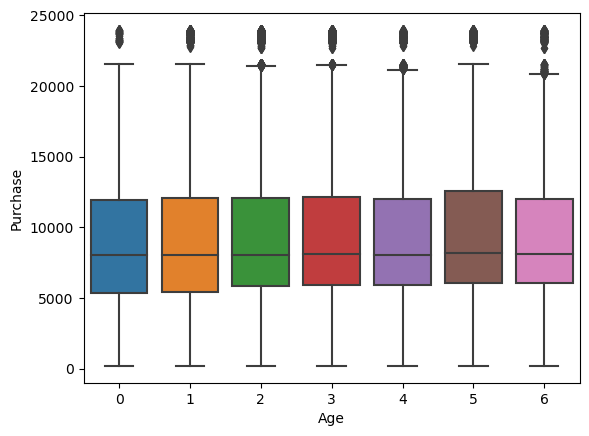

In [20]:
sns.boxplot('Age','Purchase', data = data)
plt.show()

我们看出来，好像不同年龄段的人表现是一样的，这说明在这一天每个人都使出了自己的经济最大力量来购买，也有可能是这一天的物品实在是太便宜了。

看一下城市对购买力的影响。

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


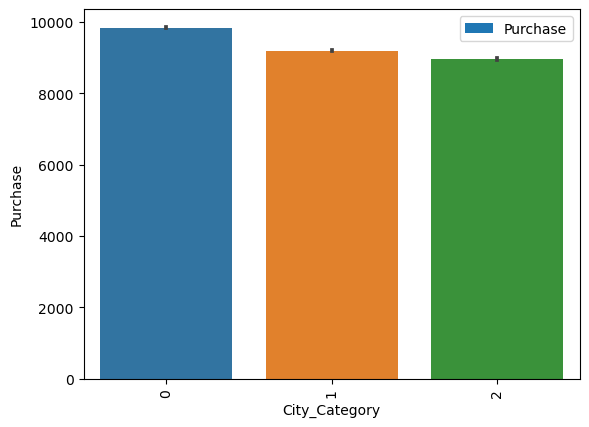

In [21]:
data[['City_Category','Purchase']].groupby('City_Category').mean().plot.bar()
sns.barplot('City_Category', 'Purchase', data = data)
plt.show()

城市 0分类的人们购买力弱一些。当然这有可能是我们调查的结果不够全面或者是这些地区发展不够快速。

绘制一个热图整体看一下相关性。可以检索热图所传递的信息

<AxesSubplot:>

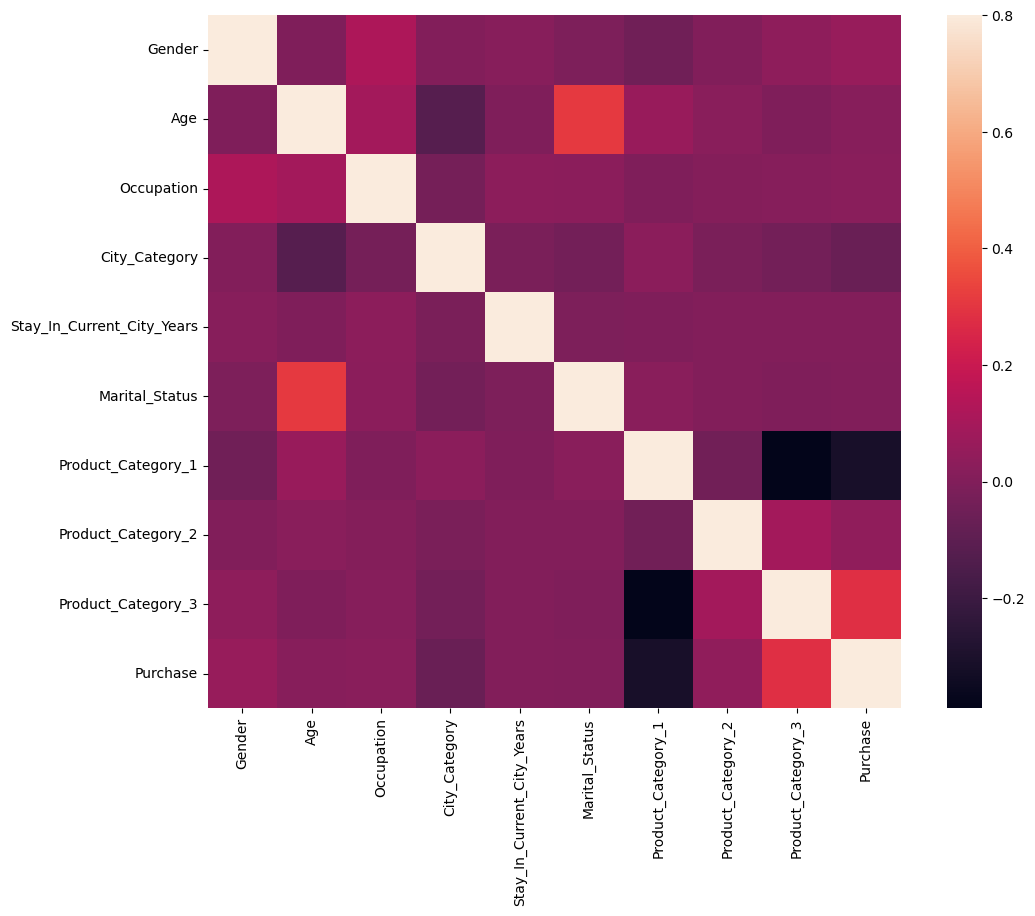

In [22]:
corrmat = data.corr()
fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

没有哪个列是于购买力强相关的。我们可以做出来一些总结。

1. Product_Category_1 于 Purchase呈现负相关.
2. Maritial_Status 和 Age 是强相关的。..
3. Product_Category_3 和 Purchase强相关. 可能他比较便宜或许是其他的。截取部分数据显示如下。

In [23]:
mean_cat_1 = data['Product_Category_1'].mean()
mean_cat_2 = data['Product_Category_2'].mean()
mean_cat_3= data['Product_Category_3'].mean()
print(f"PC1: {mean_cat_1} \n PC2: {mean_cat_2} \n PC3 : {mean_cat_3}")

PC1: 5.295546498455105 
 PC2: 6.784907092379324 
 PC3 : 3.871772787898292


我们发现 product category 3 于产品 1和 2. 相比，他的确比较便宜